## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [3]:
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Read the study results
study_results = pd.read_csv(study_results_path)

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data_df =pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
number_of_mice = combined_data_df["Mouse ID"].nunique()
#len(number_of_mice)
number_of_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_dup = combined_data_df[combined_data_df.duplicated (["Mouse ID", "Timepoint"])]
drop_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
drop_dup = combined_data_df[combined_data_df.duplicated (["Mouse ID", "Timepoint"], keep=False)]
drop_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_data_df = combined_data_df[combined_data_df["Mouse ID"] !="g989"]
len(new_combined_data_df)

1880

In [10]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = new_combined_data_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = new_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = new_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = new_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = new_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = new_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe
summary_statistics_table = pd.DataFrame({"Mean": mean,"Median": median, "Var": var, "STD": std, "SEM": sem})
summary_statistics_table

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

all_in_one = new_combined_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
all_in_one

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

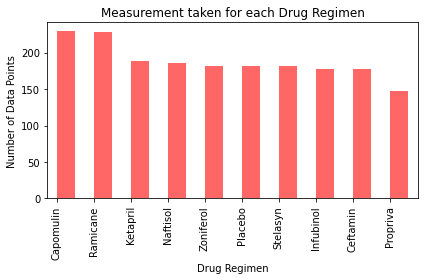

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = new_combined_data_df['Drug Regimen'].value_counts().plot.bar(width=.5, color='r', alpha=.6, align="edge")

#labesl for the bar graph and grid
bar_plot.set_title("Measurement taken for each Drug Regimen")
bar_plot.set_xlabel("Drug Regimen",)
bar_plot.set_ylabel("Number of Data Points")


plt.savefig("../Images/mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

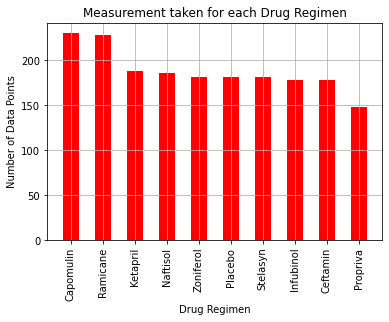

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#calculate the data points for each drug regiment
drug_regimen_count = new_combined_data_df["Drug Regimen"].value_counts()
drug_regimen_count

#set the x_axis to the lenght of the drug_regiment_count 
x_axis = np.arange(len(drug_regimen_count))
x_axis


#label the tick marks with the drug regiment names, rotation of the names is 90
tick_names = [value for value in x_axis]
plt.xticks(tick_names, drug_regimen_count.index.values, rotation=90)

#labels for x and y axis, and title
plt.title("Measurement taken for each Drug Regimen")
plt.xlabel("Drug Regimen",)
plt.ylabel("Number of Data Points")
plt.grid()
#plot the pyplot bar graph
plt.bar(x_axis, drug_regimen_count, width =.5, color='r')

plt.savefig("../Images/drug_regimen_meas.png", bbox_inches = "tight")

plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = new_combined_data_df['Sex'].value_counts()
gender

Male      958
Female    922
Name: Sex, dtype: int64

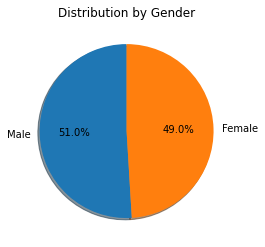

In [16]:
#pie chart
pie_plot = gender.plot.pie(autopct="%1.1f%%", shadow=True, startangle=90, title="Distribution by Gender")

#hide the ylabe with an empty string
pie_plot.set_ylabel('')

plt.savefig("../Images/pipandas_plot.png", bbox_inches = "tight")
plt.show()


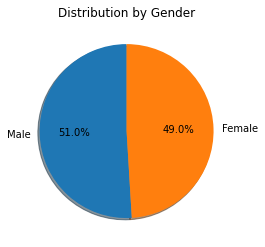

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Identify the gender data
gender = new_combined_data_df['Sex'].value_counts()
gender

#plpolt pie chart
plt.pie(gender, labels=gender.index.values, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title('Distribution by Gender')

#save file
plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")

plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Start by getting the last (greatest) timepoint for each mouse

max_mice_df = new_combined_data_df.groupby(["Mouse ID"])["Timepoint"].max()
max_mice_df = max_mice_df.reset_index()
max_mice_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_mice_df, new_combined_data_df, on=["Mouse ID", "Timepoint"])
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Find upper and lower bounds to help identify outliers for each regimen
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    tumor_vol.append(final_tumor_vol)
    #print(final_tumor_vol.head())
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
  
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    
    tumor_vol_out = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    

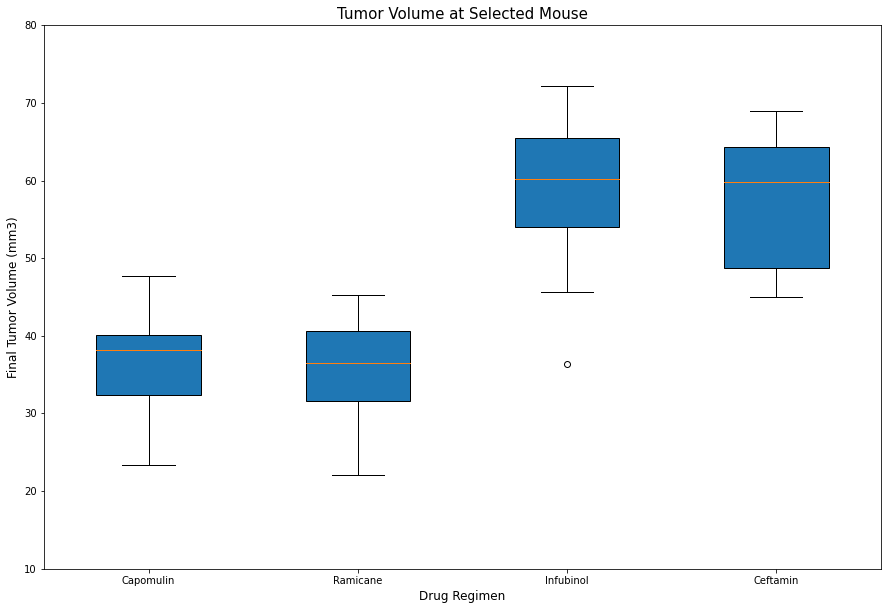

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =15)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(tumor_vol, labels=drug_regimen, widths = 0.5,patch_artist=True,vert=True)

plt.ylim(10, 80)


#plt.boxplot(tumor_vol)
plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()


## Line and Scatter Plots

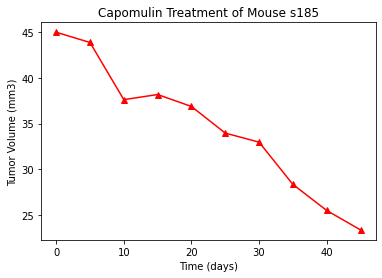

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#locate the data point for the mouse treated witht he Capmuin
mouse_treatment = new_combined_data_df.loc[new_combined_data_df["Mouse ID"] == "s185", :]
mouse_treatment.head()

#plot the line chart

plt.plot(mouse_treatment["Timepoint"], mouse_treatment["Tumor Volume (mm3)"], marker='^', color='r')

# Add labels and title 
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()

plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = new_combined_data_df.loc[new_combined_data_df['Drug Regimen'] == 'Capomulin']

capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [23]:
#average turmor volume for each mouse

avg_vol = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_vol = avg_vol.reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_vol.head()

avg_vol_df = pd.merge(capomulin_df, avg_vol, on='Mouse ID')
avg_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Average Tumor Volume
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143


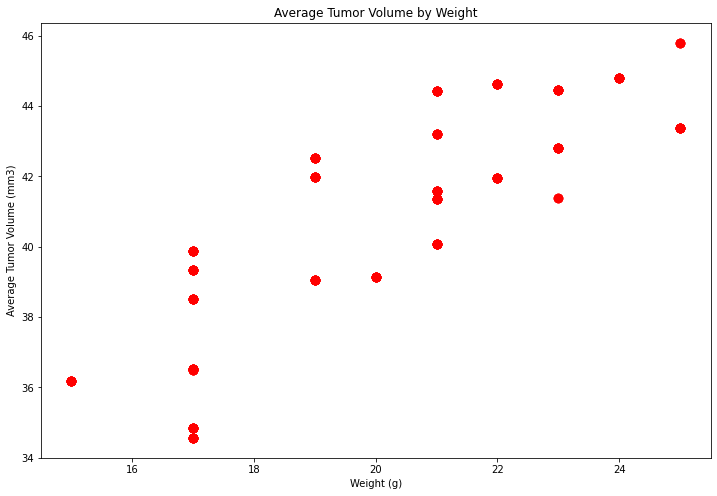

In [24]:
#plot the scatter plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size = 15
plt.scatter(avg_vol_df['Weight (g)'], avg_vol_df['Average Tumor Volume'],s=75, color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")

plt.show()

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_vol_df['Weight (g)']
y_values = avg_vol_df['Average Tumor Volume']

correlation = st.pearsonr(x_values,y_values)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.83.
y = 0.96x + 21.49


The r-squared is: 0.6962164535925288


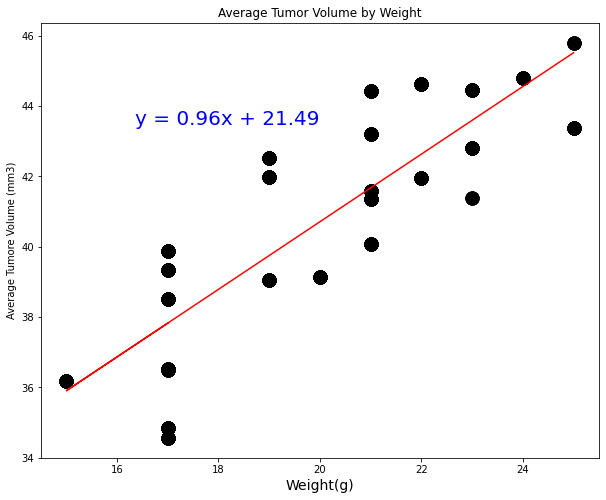

In [26]:
# Add labels and title to plot
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values,y_values,s=175, color="black")
plt.plot(x_values,regress_values,"r-")
plt.title('Average Tumor Volume by Weight',fontsize =12)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =10)

# Annotate linear regression
ax1.annotate(line_eq, xy=(22, 36), xycoords='data',xytext=(0.5, 0.8), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")

plt.show()